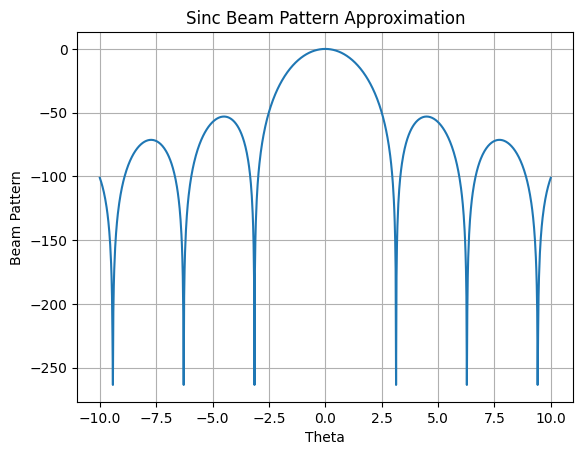

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sinc function
def sinc(x):
    return (np.sinc(x/np.pi)**2)

# Define the beam pattern approximation
def beam_pattern(theta):
    return sinc(theta)

# Generate theta values
rng=10 #np.pi*6.9
theta = np.linspace(-rng, rng, 1001)

# Calculate the beam pattern approximation
beam_values = beam_pattern(theta)+1e-12

# Plot the beam pattern
plt.plot(theta, 20*np.log10(beam_values**2))
plt.xlabel('Theta')
plt.ylabel('Beam Pattern')
plt.title('Sinc Beam Pattern Approximation')
#plt.ylim((-10, 0))
plt.grid(True)
plt.show()


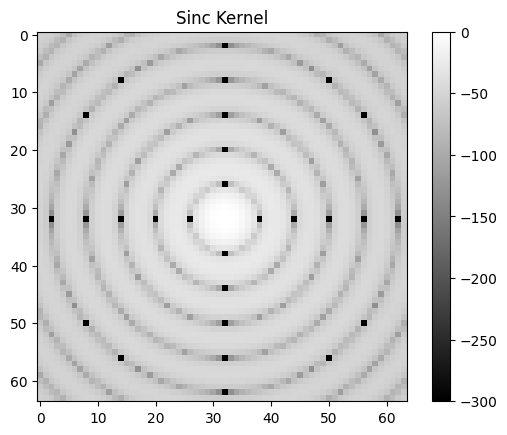

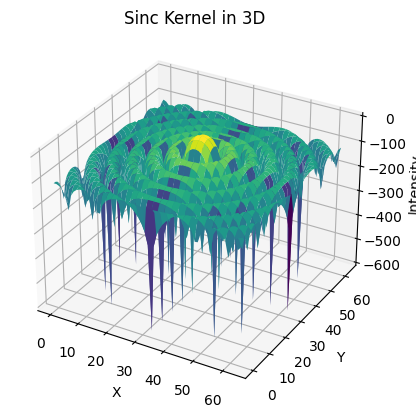

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_sinc_kernel(size, sigma):
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            distance = np.sqrt(x**2 + y**2)
            kernel[i, j] = np.sinc(distance / sigma)**2+1e-15
    return kernel

# Example usage
kernel_size = 64
sigma = 6.0
sinc_kernel = generate_sinc_kernel(kernel_size, sigma)

#plot the sinc kernel and an example of its use
plt.imshow(20*np.log10(sinc_kernel), cmap='gray')
plt.title('Sinc Kernel')
plt.colorbar()
plt.show()


# Create a meshgrid for x and y coordinates
x = np.arange(kernel_size)
y = np.arange(kernel_size)
X, Y = np.meshgrid(x, y)

# Plot the sinc kernel in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, 20*np.log10(sinc_kernel**2), cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('Sinc Kernel in 3D')
plt.show()





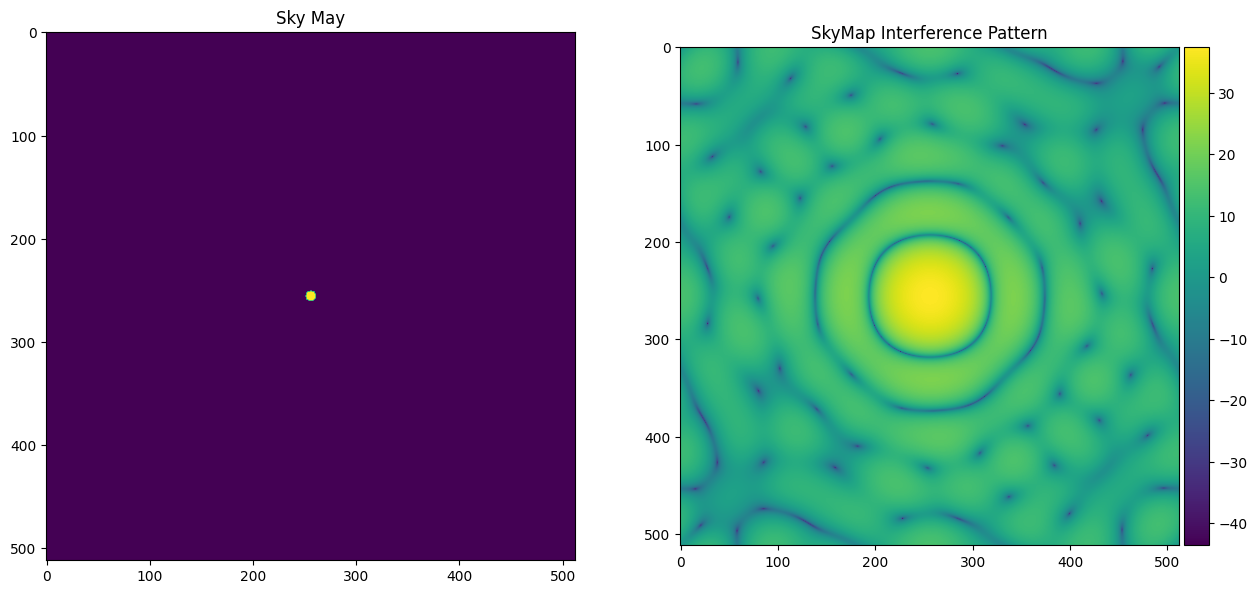

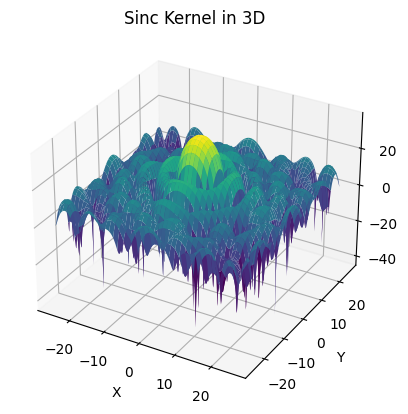

In [3]:
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

stepSize=0.1
dot=lambda mx,my,r,s,o : np.array([[0. if ((x+o[0])**2+(y+o[1])**2)>(r*r) else 1. for x in np.arange(-mx,mx,s)] for y in np.arange(-my,my,s)])

yy=dot(25.6,25.6,0.5,stepSize,(0,0))
Hyy=calculate_2dft(yy)
HyyMAG=np.array([[20*np.log10(np.linalg.norm(ii)) for ii in jj] for jj in Hyy])


fig,ax=plt.subplots(1,2,figsize=(15,15))
#ax[0].imshow(yy)
im=[ax[jjj].imshow(data) for jjj,data in enumerate([yy,HyyMAG])]
[ax[jjj].set_title(data) for jjj,data in enumerate(["Sky May","SkyMap Interference Pattern"])]

# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1], cax=cax, orientation='vertical')

# Plot the sinc kernel in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(-25.6,25.6,512),np.linspace(-25.6,25.6,512))

ax.plot_surface(X,Y , HyyMAG, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('Sinc Kernel in 3D')
plt.show()


